## Members:

| S.No      | Name | Roll No     |
| :---:        |    :----:   |          :---: |
| 1.      | Keshav S       | CB.EN.U4CSE20327   |
| 2.   | Raj Mota        | CB.EN.U4CSE20349      |
| 3.      | Sai Sidharth Sriram       | CB.EN.U4CSE20352   |
| 4.   | Sanjith Raghav S      | CB.EN.U4CSE20355      |
| 5.   | Tarun Rajkumar       | CB.EN.U4CSE20365      |

In [59]:
#Base Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Splitting the Dataset into Test and Train
from sklearn.model_selection import train_test_split

#Encoding the Ordinal Data
from sklearn.preprocessing import LabelEncoder

#ML Models
#Decision Tree
from sklearn import tree
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#KNN
from sklearn.neighbors import KNeighborsClassifier 
#Naive Bayes
from sklearn.naive_bayes import GaussianNB 

#Initializing the Classifiers
#Logisitc Regression
d_tree_classifier = tree.DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
gaussianNB_classifier = GaussianNB()  
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski') 
logistic_classifier =LogisticRegression(solver='lbfgs', max_iter=1000)

#Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

#Plotting Decision Tree and Random Forest
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

from sklearn.metrics import classification_report

### Attribute Information

### About the Data

-----------------------------------------------------------------------------------------------------------------------------

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Basic Analysis of the Data

In [3]:
print("Dimensions of the Dataset: ",df.shape)
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Dimensions of the Dataset:  (5110, 12)
Number of Rows:  5110
Number of Columns:  12


In [4]:
print("Dataset Info: \n")
df.info()

Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
print("5 Number Summary about the data - Includes only Numerical Data: \n")
df.describe()

5 Number Summary about the data - Includes only Numerical Data: 



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
print("Description of Categorical Data: \n")
df.astype('object').describe().transpose()

Description of Categorical Data: 



,count,unique,top,freq
id,5110,5110,9046,1
gender,5110,3,Female,2994
age,5110.0,104.0,78.0,102.0
hypertension,5110,2,0,4612
heart_disease,5110,2,0,4834
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
avg_glucose_level,5110.0,3979.0,93.88,6.0
bmi,4909.0,418.0,28.7,41.0


In [7]:
print("Checking the number of NaN values column wise: \n")
df.isna().sum()

Checking the number of NaN values column wise: 



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Data Prepossessing

In [8]:
#Dealing with NaN values in the BMI Column
print("Mean: ", df['bmi'].mean())
print("Median: ", df['bmi'].median())
#Choosing the Mean to replace NaN values
median = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(value=median)
df.isna().sum()

Mean:  28.893236911794673
Median:  28.1


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#The ID Column is found to be no importance when passing the data to the ML Model and predicting data
#Hence we remove this column
df = df.drop(['id'], axis=1)

In [10]:
#Age Column has float values so we remove those values
df['age'] = df['age'].astype('int')

#Gender has one anomoly data with Other as the Gender so we remove them
df = df[df['gender'] != 'Other']

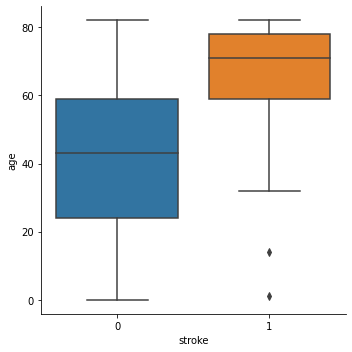

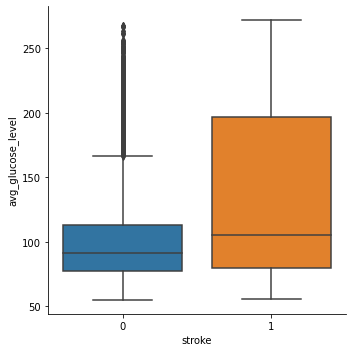

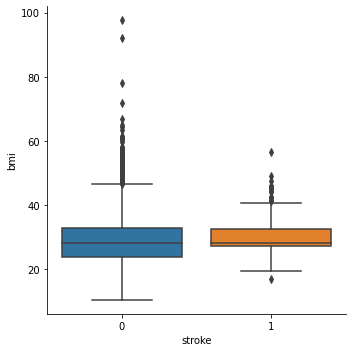

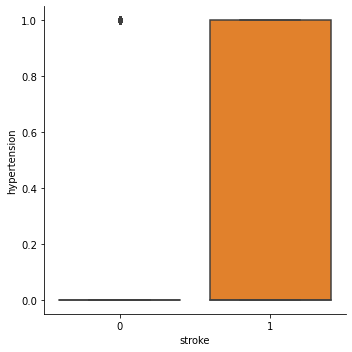

In [11]:
#Outlier Analysis using BoxPlot
#sns.catplot -> Used for Categorical Data
sns.catplot(data=df, x="stroke", y="age", kind="box")
sns.catplot(data=df, x="stroke", y="avg_glucose_level", kind="box")
sns.catplot(data=df, x="stroke", y="bmi", kind="box")
sns.catplot(data=df, x='stroke', y='hypertension', kind='box')

##### Removing the Outliers

In [12]:
#Deleting Outliers in Age Column
indexAge = df[((df['age'] < 20) & (df['stroke'] == 1))].index
df.drop(indexAge, inplace=True)

In [13]:
#Deleting Outliers in Avg Glucose Level Column
indexAge = df[((df['avg_glucose_level'] > 220) & (df['stroke'] == 0))].index
df.drop(indexAge, inplace=True)

In [14]:
#Deleting Outliers in BMI Column
indexAge = df[((df['bmi'] > 50) & (df['stroke'] == 0))].index
df.drop(indexAge, inplace=True)

indexAge = df[((df['bmi'] > 40) & (df['stroke'] == 1))].index
df.drop(indexAge, inplace=True)

indexAge = df[((df['bmi'] < 19) & (df['stroke'] == 1))].index
df.drop(indexAge, inplace=True)

In [15]:
#Creating a Copy of the DataFrame for later use
df_copy = df.copy()

In [16]:
#Checking the Dataset info and 5 Number Summary after removing Outliers

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4838 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4838 non-null   object 
 1   age                4838 non-null   int32  
 2   hypertension       4838 non-null   int64  
 3   heart_disease      4838 non-null   int64  
 4   ever_married       4838 non-null   object 
 5   work_type          4838 non-null   object 
 6   Residence_type     4838 non-null   object 
 7   avg_glucose_level  4838 non-null   float64
 8   bmi                4838 non-null   float64
 9   smoking_status     4838 non-null   object 
 10  stroke             4838 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 434.7+ KB


In [18]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000
mean,42.457214,0.089706,0.051054,101.096263,28.231749,0.047127
std,22.716310,0.285790,0.220131,38.169299,6.778789,0.211932
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,24.000000,0.000000,0.000000,76.572500,23.500000,0.000000
50%,44.000000,0.000000,0.000000,90.600000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,111.035000,32.300000,0.000000
max,82.000000,1.000000,1.000000,271.740000,49.900000,1.000000


### Visualization

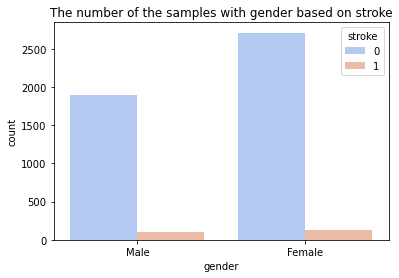

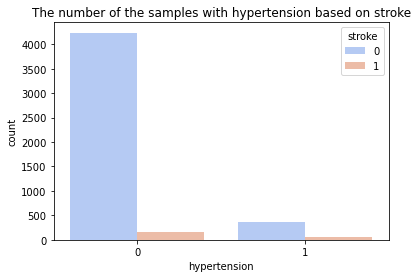

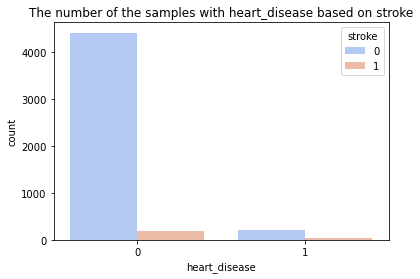

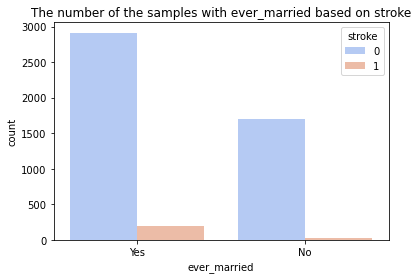

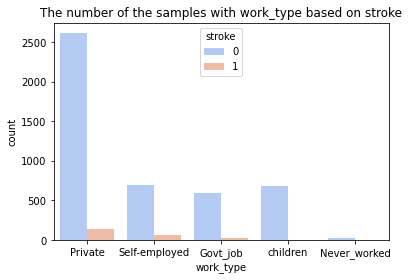

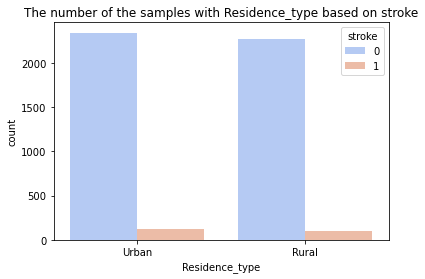

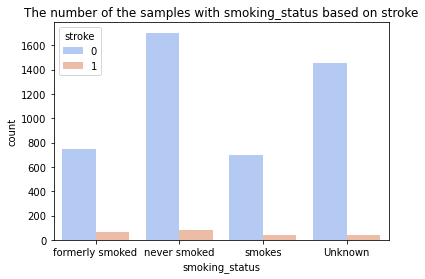

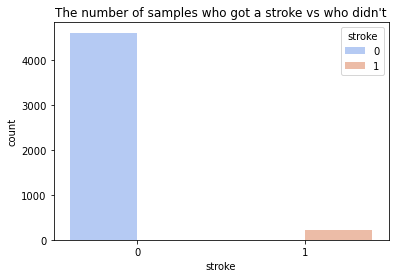

In [19]:
#Comparing the number of values in every column against the Stroke column
#This gives us an idea about the split of the Data
for i in df.columns[:]:
    #Only selects the column with Categorical Data or Numerical Data
    if (df[i].dtype == 'object') or (df[i].dtype == 'int64'):
            #sns.countplot shows the Count of every column and since we compare it with stroke
            sns.countplot(data = df, x = i, hue = 'stroke',palette='coolwarm')
            if(i == 'stroke'):
                plt.title("The number of samples who got a stroke vs who didn't".format(i))
            else:
                plt.title("The number of the samples with {} based on stroke".format(i))
            plt.show()

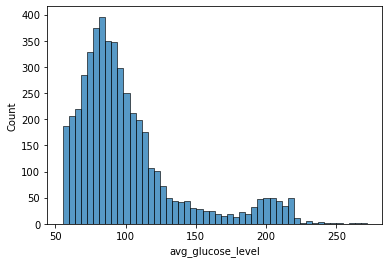

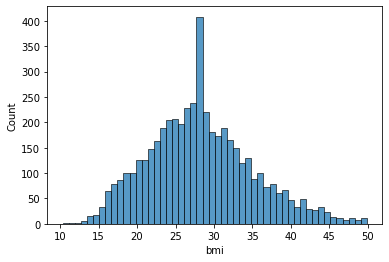

In [20]:
for i in df.columns[:]:
    #Only selects the column with Categorical Data or Numerical Data
            #sns.countplot shows the Count of every column and since we compare it with stroke
        if i == 'bmi' or i == 'avg_glucose_level':
            sns.histplot(df[i],bins=50)
            plt.show()

([<matplotlib.patches.Wedge at 0x20b60ade910>,
 [Text(-1.0879660962979023, 0.16226451647326848, 'no stroke'),
  Text(1.1868721174823185, -0.17701575281041582, 'stroke')],
 [Text(-0.5934360525261285, 0.08850791807632825, '95.3%'),
  Text(0.6923420685313523, -0.10325918913940921, '4.7%')])

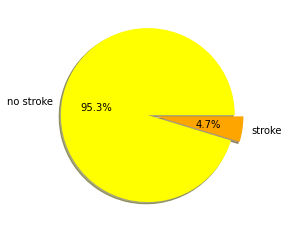

In [21]:
pie_df = pd.DataFrame(df.groupby('stroke')['stroke'].count())
plt.pie(pie_df['stroke'], labels=['no stroke', 'stroke'],autopct='%.1f%%', colors=['yellow','orange'], radius=1, explode=(0, 0.1), shadow=True)

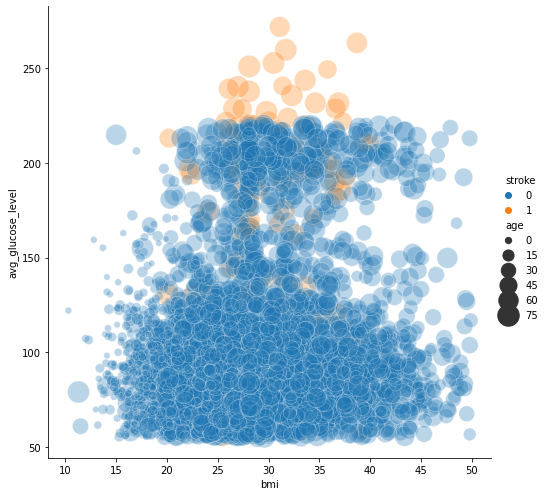

In [22]:
sns.relplot(x="bmi", y="avg_glucose_level", hue="stroke", size="age",
            sizes=(40, 500), alpha=0.3,
            height=7, data=df)

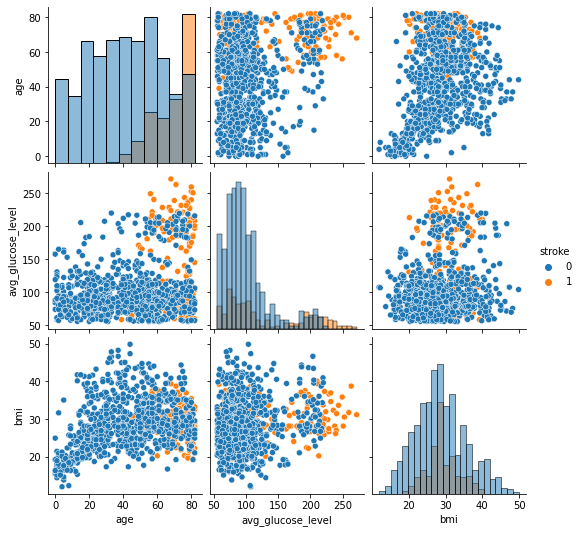

In [23]:
numerical_data = df[['age','avg_glucose_level','bmi','stroke']].head(1000)
numerical_data = sns.pairplot(numerical_data, hue='stroke',diag_kind='hist')

### Feature Processing - Encoding the Data

In [24]:
#Encoding the Categorical Data 
#Using Label Encoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.6,1,1
1,0,61,0,0,1,3,0,202.21,28.1,2,1
2,1,80,0,1,1,2,0,105.92,32.5,2,1
3,0,49,0,0,1,2,1,171.23,34.4,3,1
4,0,79,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,2,1,83.75,28.1,2,0
5106,0,81,0,0,1,3,1,125.20,40.0,2,0
5107,0,35,0,0,1,3,0,82.99,30.6,2,0
5108,1,51,0,0,1,2,0,166.29,25.6,1,0


In [25]:
#Finding the Covarience and Correlation using Heat Map
df.corr().style.background_gradient(cmap='GnBu')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.033646,0.013949,0.089317,-0.035380,0.060705,-0.004929,0.047216,-0.014968,-0.060144,0.013268
age,-0.033646,1.000000,0.274520,0.263194,0.682414,-0.375017,0.015651,0.180330,0.362348,0.272811,0.258032
hypertension,0.013949,0.274520,1.000000,0.098069,0.162478,-0.053867,-0.002558,0.143428,0.139041,0.120214,0.134987
heart_disease,0.089317,0.263194,0.098069,1.000000,0.111715,-0.032731,0.006303,0.152078,0.054927,0.052712,0.152263
ever_married,-0.035380,0.682414,0.162478,0.111715,1.000000,-0.360808,0.002122,0.113964,0.359247,0.264506,0.112438
work_type,0.060705,-0.375017,-0.053867,-0.032731,-0.360808,1.000000,-0.006971,-0.036045,-0.332188,-0.317875,-0.037184
Residence_type,-0.004929,0.015651,-0.002558,0.006303,0.002122,-0.006971,1.000000,0.000059,0.007159,0.007722,0.011747
avg_glucose_level,0.047216,0.180330,0.143428,0.152078,0.113964,-0.036045,0.000059,1.000000,0.124160,0.047066,0.167889
bmi,-0.014968,0.362348,0.139041,0.054927,0.359247,-0.332188,0.007159,0.124160,1.000000,0.249418,0.025811
smoking_status,-0.060144,0.272811,0.120214,0.052712,0.264506,-0.317875,0.007722,0.047066,0.249418,1.000000,0.032055


In [26]:
#Finding the Covarience and Correlation using Heat Map
df.cov().style.background_gradient(cmap='GnBu')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,0.242585,-0.376449,0.001963,0.009684,-0.008345,0.032871,-0.001214,0.887637,-0.049975,-0.031867,0.001385
age,-0.376449,516.030730,1.782214,1.316119,7.423978,-9.365694,0.177754,156.357560,55.797575,6.666828,1.242248
hypertension,0.001963,1.782214,0.081676,0.006170,0.022238,-0.016925,-0.000365,1.564573,0.269366,0.036959,0.008176
heart_disease,0.009684,1.316119,0.006170,0.048458,0.011777,-0.007921,0.000694,1.277795,0.081964,0.012483,0.007104
ever_married,-0.008345,7.423978,0.022238,0.011777,0.229351,-0.189967,0.000508,2.083211,1.166261,0.136272,0.011412
work_type,0.032871,-9.365694,-0.016925,-0.007921,-0.189967,1.208656,-0.003832,-1.512546,-2.475637,-0.375947,-0.008664
Residence_type,-0.001214,0.177754,-0.000365,0.000694,0.000508,-0.003832,0.249976,0.001120,0.024264,0.004154,0.001245
avg_glucose_level,0.887637,156.357560,1.564573,1.277795,2.083211,-1.512546,0.001120,1456.895396,32.125422,1.932601,1.358103
bmi,-0.049975,55.797575,0.269366,0.081964,1.166261,-2.475637,0.024264,32.125422,45.951979,1.818864,0.037081
smoking_status,-0.031867,6.666828,0.036959,0.012483,0.136272,-0.375947,0.004154,1.932601,1.818864,1.157282,0.007308


### Modelling the Data

In [27]:
X = df.drop(['stroke'],axis=1)
Y = df['stroke'].to_frame()

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3 , random_state=10)

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Normalizing the Data because if the values are too far split, then the Model tends to overfit

## Implementing Various Classification Models

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN - Kth Nearest Neighbour
5. Naive Bayes

### 1. Decision Tree

In [30]:
d_tree_classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

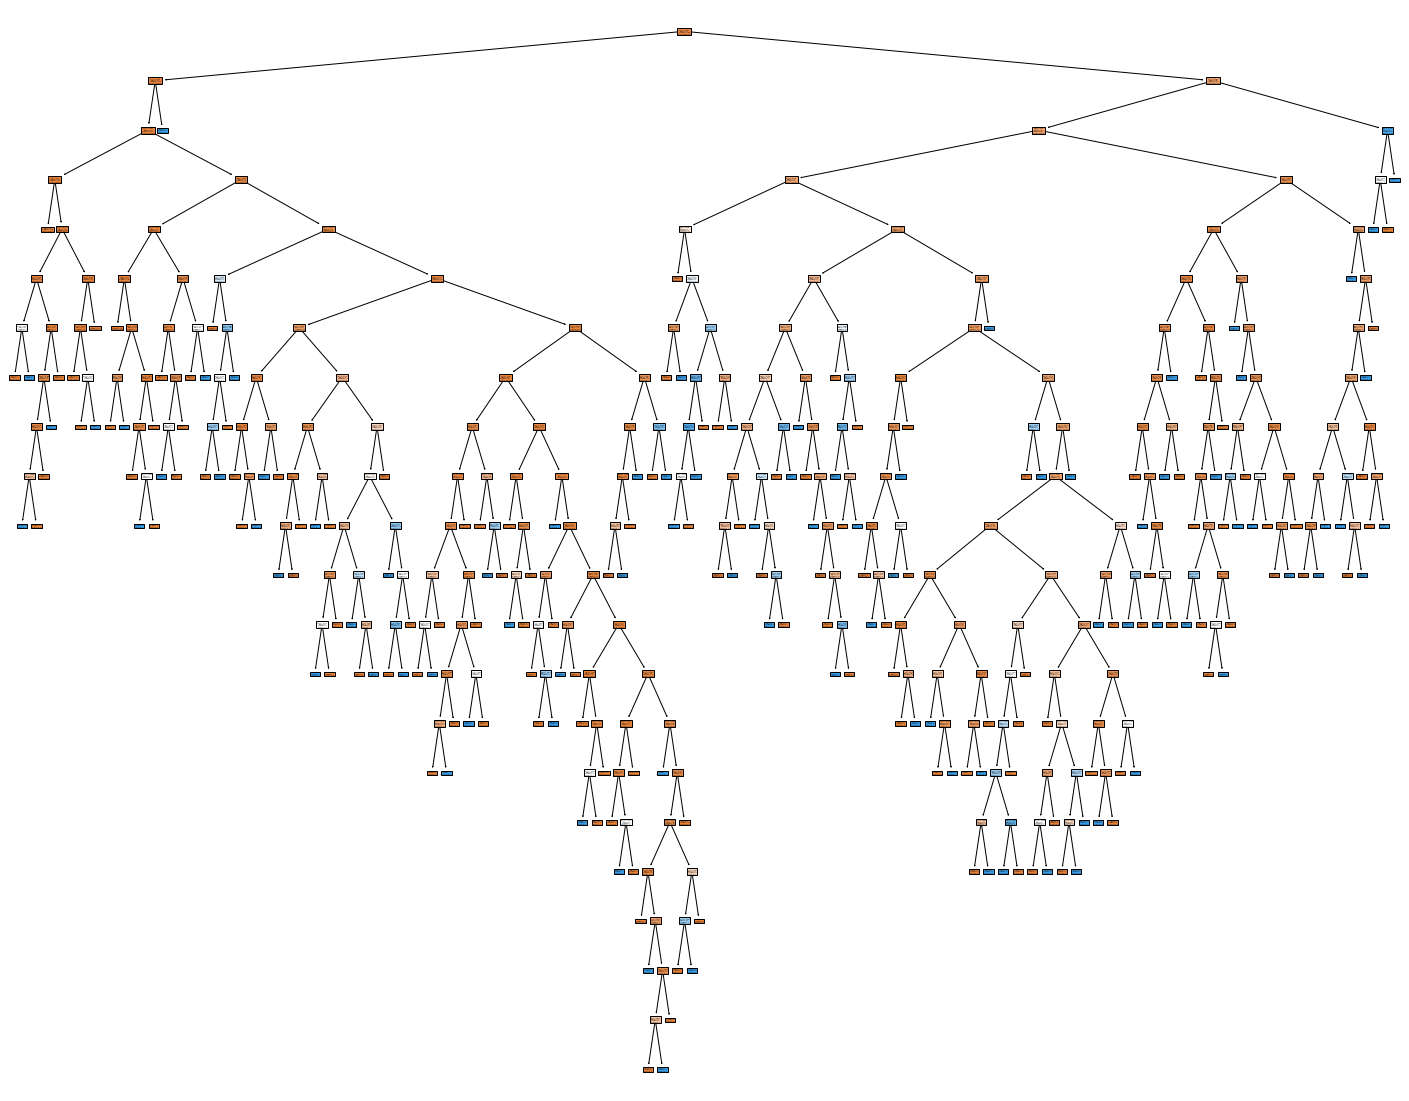

'\nEntropy -  Measure of Randomness\nEntropy(target, column) = Prob(attr1) * Entropy(Yes/No) + Prob(attr2) * Entropy(Yes/No)... -> for that attri\nEntropy(Yes/No) = Entropy(Yes) + Entropy(No)\nEntropy(Yes) = -P(yes) * log(P(yes))\n\nInformation Gain - Shows how valuable a column is to getting a prediction\nRoot Node - Max(Information Gain)\n\nInformation Gain = Entropy(Target) - Entropy(Target, Column)\n'

In [31]:
Y_pred_dt = d_tree_classifier.predict(X_test)
plt_1 = plt.figure(figsize=(25, 20))
plot_tree(d_tree_classifier,filled=True)
plt.show()
plt_1.savefig('Decision_Tree.png')

'''
Entropy -  Measure of Randomness
Entropy(target, column) = Prob(attr1) * Entropy(Yes/No) + Prob(attr2) * Entropy(Yes/No)... -> for that attri
Entropy(Yes/No) = Entropy(Yes) + Entropy(No)
Entropy(Yes) = -P(yes) * log(P(yes))

Information Gain - Shows how valuable a column is to getting a prediction
Root Node - Max(Information Gain)

Information Gain = Entropy(Target) - Entropy(Target, Column)
'''

### Evaluation Metrics

#### Confusion Matrix

Confusion Matrix for Decision Tree: 
 [[1329   55]
 [  54   14]]


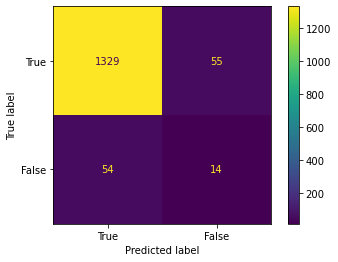

In [32]:
confu_mat_dTree = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix for Decision Tree: \n",confu_mat_dTree)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_dTree, display_labels=[True, False])
confu_mat_visualize.plot()

In [33]:
print('Accuracy Score :',accuracy_score(Y_pred_dt,Y_test))
print('Precision Score :',precision_score(Y_pred_dt, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_dt,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_dt, Y_test, average='weighted'))

Accuracy Score : 0.9249311294765841
Precision Score : 0.9244115855629025
Recall score : 0.9249311294765841
F1_Score : 0.9246707205255783


### 2. Random Forest

In [34]:
rf_classifier.fit(X_train,Y_train.values.ravel())

RandomForestClassifier()

In [35]:
Y_pred_rf = rf_classifier.predict(X_test)

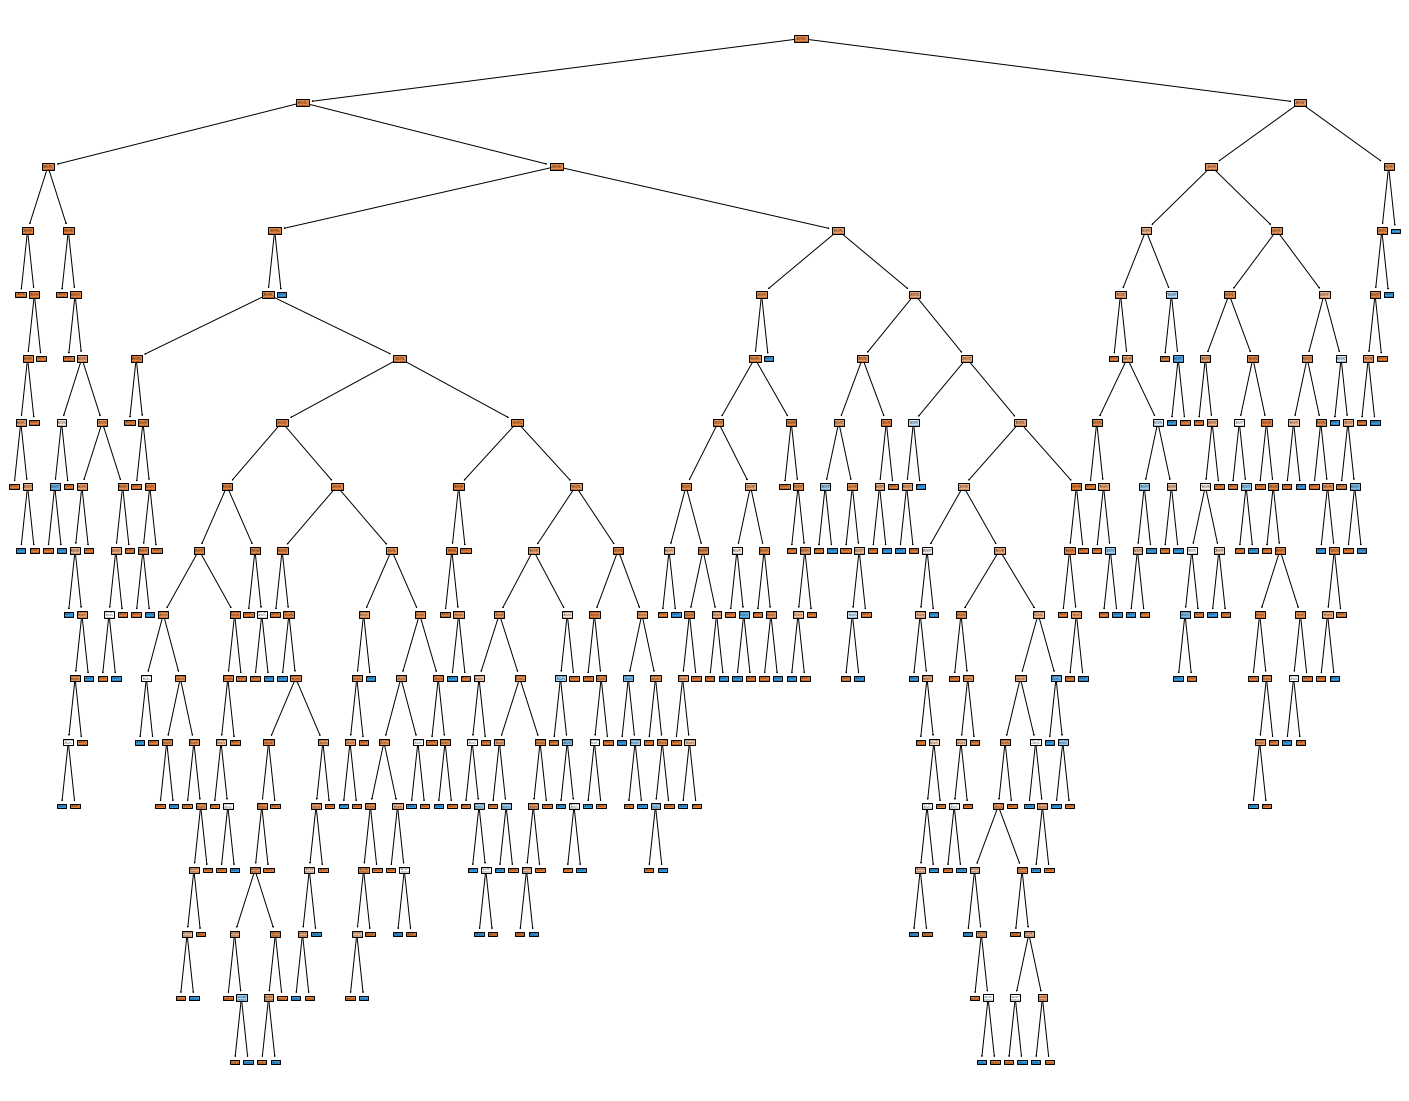

In [36]:
plt_1 = plt.figure(figsize=(25, 20))
tree.plot_tree(rf_classifier.estimators_[5],filled=True)
plt.show()

Confusion Matrix for Random Forest: 
 [[1383    1]
 [  59    9]]


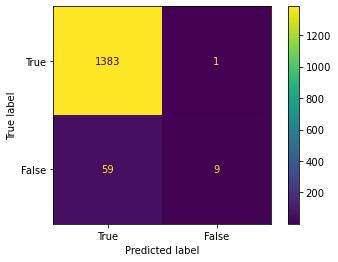

In [37]:
confu_mat_randomForest = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix for Random Forest: \n",confu_mat_randomForest)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_randomForest, display_labels=[True, False])
confu_mat_visualize.plot()

In [38]:
print('Accuracy Score :',accuracy_score(Y_pred_rf,Y_test))
print('Precision Score :',precision_score(Y_pred_rf, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_rf,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_rf, Y_test, average='weighted'))

Accuracy Score : 0.9586776859504132
Precision Score : 0.9933069021331361
Recall score : 0.9586776859504132
F1_Score : 0.973617066842313


### 3. Naive Bayes

In [39]:
'''
P(y|x) = P(x|y) * P(y)/ P(x)
'''

'\nP(y|x) = P(x|y) * P(y)/ P(x)\n'

In [40]:
gaussianNB_classifier.fit(X_train, Y_train.values.ravel())
Y_pred_nb = gaussianNB_classifier.predict(X_test)

In [41]:
df_nb = pd.DataFrame({"Y_Pre":Y_pred_nb, "Y_Actual":Y_test.values.ravel()})
df_nb

,Y_Pre,Y_Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1447,0,0
1448,0,0
1449,0,0
1450,0,0


### Evaluation Metrics

##### Confusion Matrix

Confusion Matrix for Naive Bayes: 
 [[1263  121]
 [  32   36]]


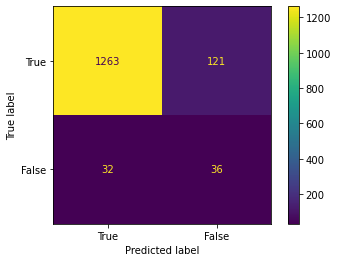

In [42]:
confu_mat_Naive = confusion_matrix(Y_test, Y_pred_nb)  
print("Confusion Matrix for Naive Bayes: \n",confu_mat_Naive)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_Naive, display_labels=[True, False])
confu_mat_visualize.plot()

In [43]:
print('Accuracy Score :',accuracy_score(Y_pred_nb,Y_test))
print('Precision Score :',precision_score(Y_pred_nb, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_nb,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_nb, Y_test, average='weighted'))

Accuracy Score : 0.8946280991735537
Precision Score : 0.8711423666824967
Recall score : 0.8946280991735537
F1_Score : 0.875538177252521


### 4. KNN

In [44]:
error_rate=[]
for i in range(1,40):
    knn_classifier = KNeighborsClassifier(n_neighbors=i) 
    knn_classifier.fit(X_train, Y_train.values.ravel())
    pred_i = knn_classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test.values.ravel()))

Text(0, 0.5, 'Error')

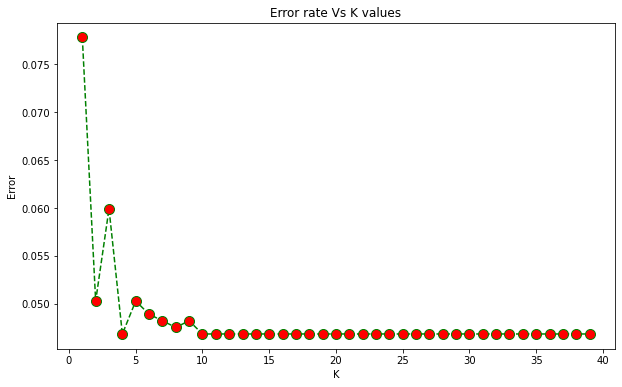

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate Vs K values')
plt.xlabel('K')
plt.ylabel('Error')

In [46]:
#.values converts the data to a 1D array and .ravel() flattens it
knn_classifier.fit(X_train, Y_train.values.ravel())  
Y_pred_knn = knn_classifier.predict(X_test) 

In [47]:
df_knn = pd.DataFrame({"Y_Pre":Y_pred_knn, "Y_Actual":Y_test.values.ravel()})
df_knn

,Y_Pre,Y_Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1447,0,0
1448,0,0
1449,0,0
1450,0,0


### Evaluation Metrics

##### Confusion Matrix

Confusion Matrix for KNN: 
 [[1384    0]
 [  68    0]]


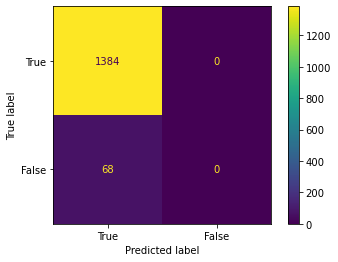

In [48]:
confu_mat_KNN = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix for KNN: \n",confu_mat_KNN)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_KNN, display_labels=[True, False])
confu_mat_visualize.plot()

In [49]:
print('Accuracy Score :',accuracy_score(Y_pred_knn,Y_test))
print('Precision Score :',precision_score(Y_pred_knn, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_knn,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_knn, Y_test, average='weighted'))

Accuracy Score : 0.953168044077135
Precision Score : 1.0
Recall score : 0.953168044077135
F1_Score : 0.9760225669957686


C:\Users\Saisid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [50]:
logistic_classifier.fit(X_train,Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [51]:
Y_pred_logistic = logistic_classifier.predict(X_test)

### Evaluation Metrics

#### Confusion Matrix

Confusion Matrix for Logistic Regression: 
 [[1384    0]
 [  67    1]]


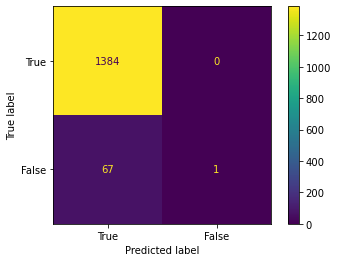

In [52]:
confu_mat_log = confusion_matrix(Y_test,Y_pred_logistic)
print("Confusion Matrix for Logistic Regression: \n",confu_mat_log)
confu_mat_visualize = metrics.ConfusionMatrixDisplay(confusion_matrix=confu_mat_log, display_labels=[True, False])
confu_mat_visualize.plot()

In [53]:
print('Accuracy Score :',accuracy_score(Y_pred_logistic,Y_test))
print('Precision Score :',precision_score(Y_pred_logistic, Y_test, average='weighted'))
print('Recall score :',recall_score(Y_pred_logistic,Y_test, average='weighted'))
print('F1_Score :',f1_score(Y_pred_logistic, Y_test, average='weighted'))

Accuracy Score : 0.9538567493112947
Precision Score : 0.9993214227839896
Recall score : 0.9538567493112947
F1_Score : 0.975714376548808
